# Imports & Open File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
crypto_df = pd.read_csv("CryptocoinsHistoricalPrices.csv")

In [3]:
crypto_df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market.Cap', 'coin', 'Delta'],
      dtype='object')

In [4]:
crypto_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,1/4/18,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512
1,2,1/3/18,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875
2,3,1/2/18,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604
3,4,1/1/18,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242
4,5,12/31/17,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591


In [5]:
#determine total number of altcoins
crypto_df["coin"].nunique()

1356

In [6]:
#filter out top 15 cryptocurrencies to analyze
top15 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:] 
top15.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,1/4/18,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512
1,2,1/3/18,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875
2,3,1/2/18,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604
3,4,1/1/18,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242
4,5,12/31/17,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591


# 1) Correlation with Bitcoin

In [7]:
#filter the top 15 dataframe
top15 = top15[["Date", "Close", "coin"]]

In [8]:
#convert the date to datetime so we can use it in a plot 
#top15.set_index(pd.to_datetime(top15["Date"], format = "%m/%d/%y"), inplace = True) 
top15["Date"]=pd.to_datetime(top15["Date"]) #, format = "%m/%d/%y")
top15.head()

,Date,Close,coin
0,2018-01-04,15599.2,BTC
1,2018-01-03,15201.0,BTC
2,2018-01-02,14982.1,BTC
3,2018-01-01,13657.2,BTC
4,2017-12-31,14156.4,BTC


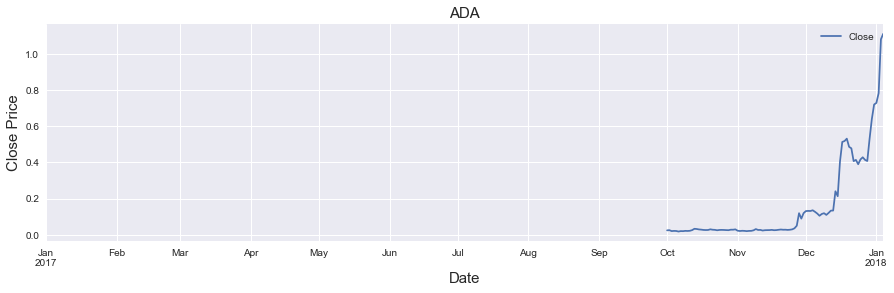

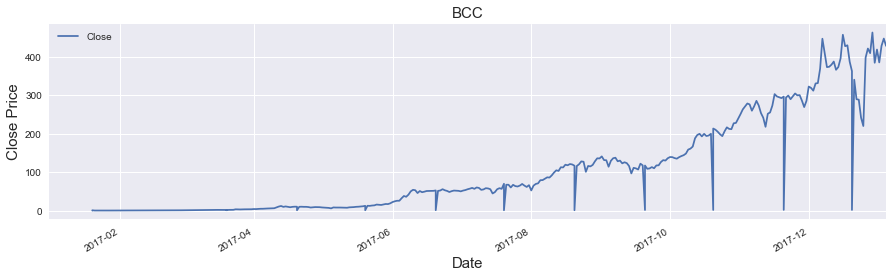

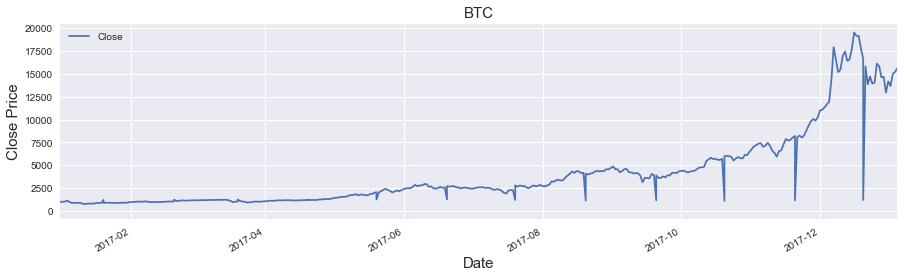

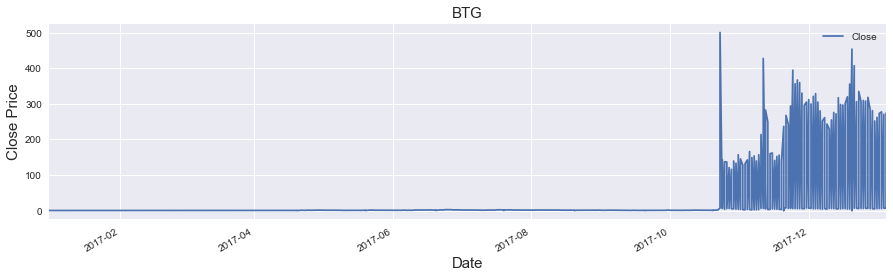

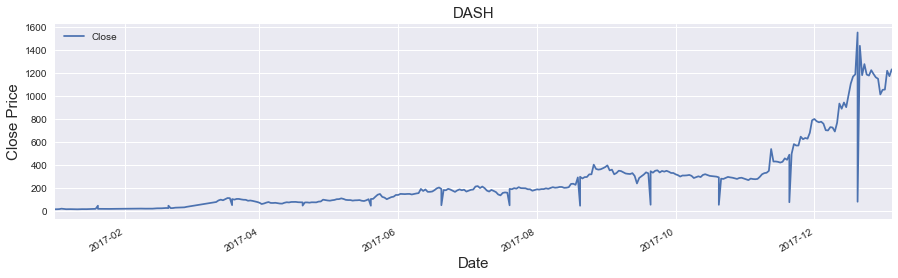

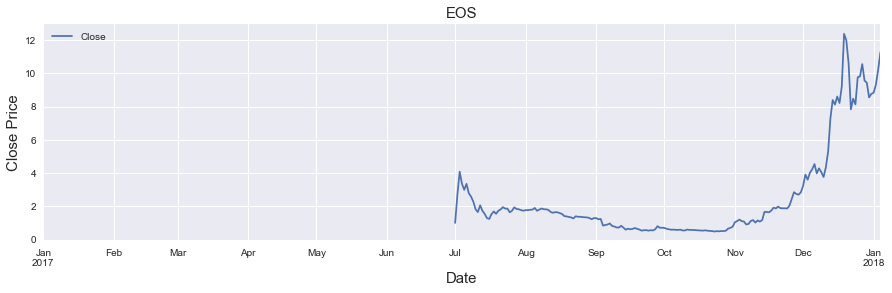

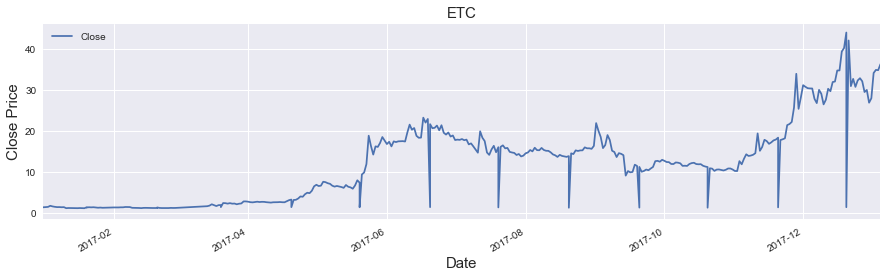

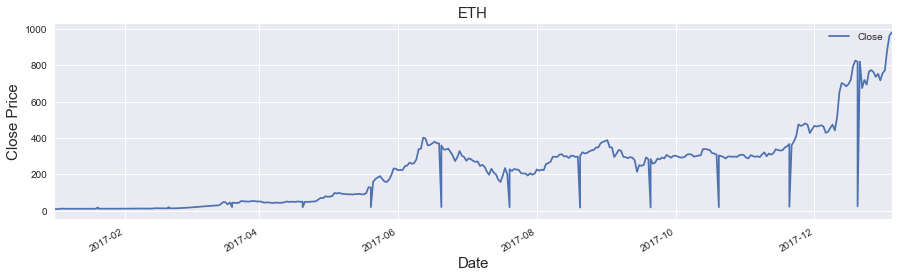

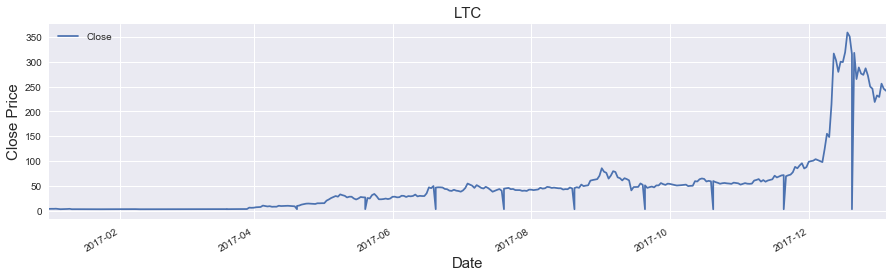

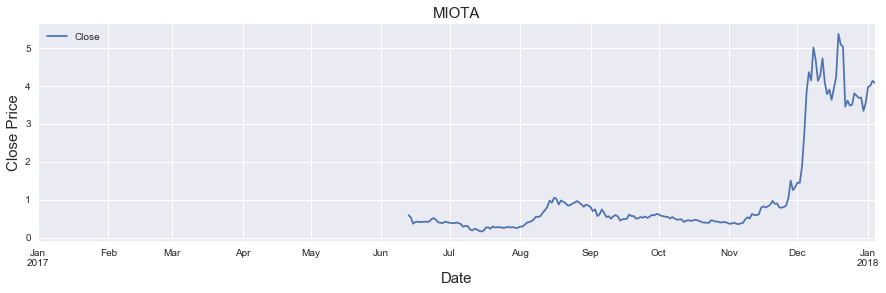

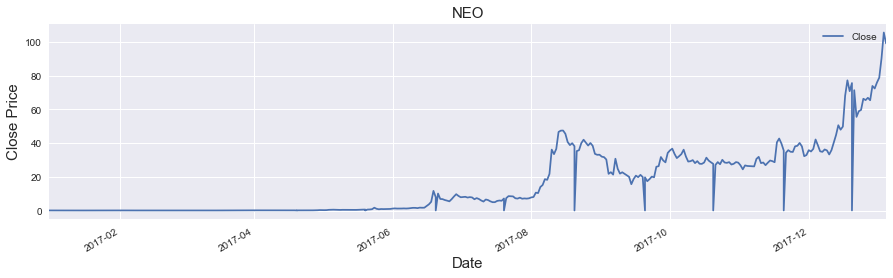

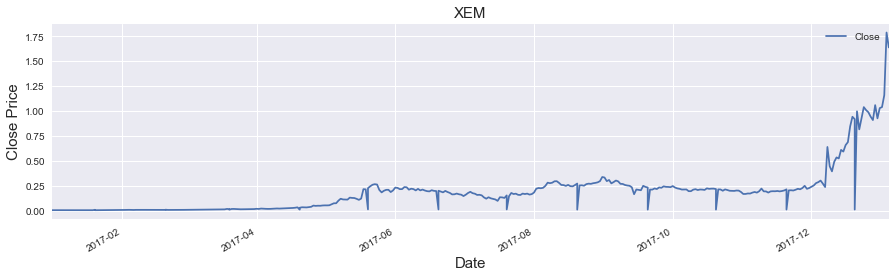

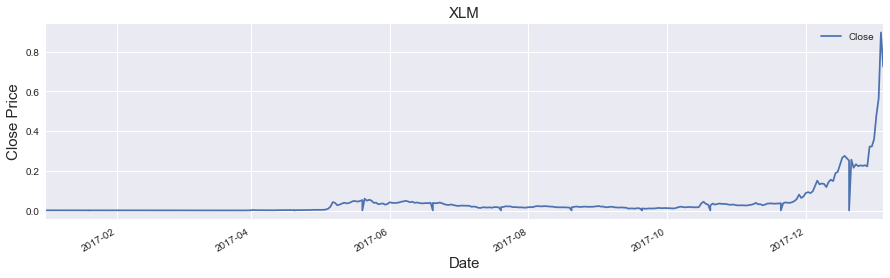

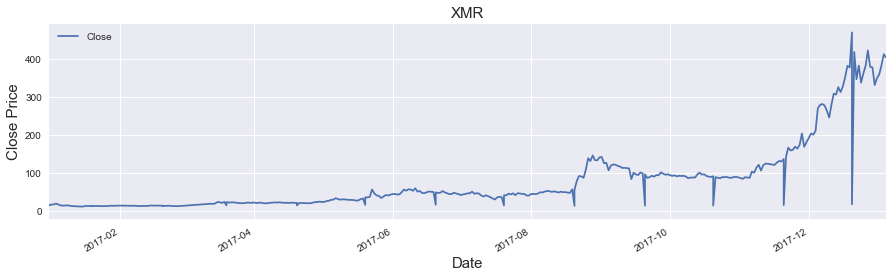

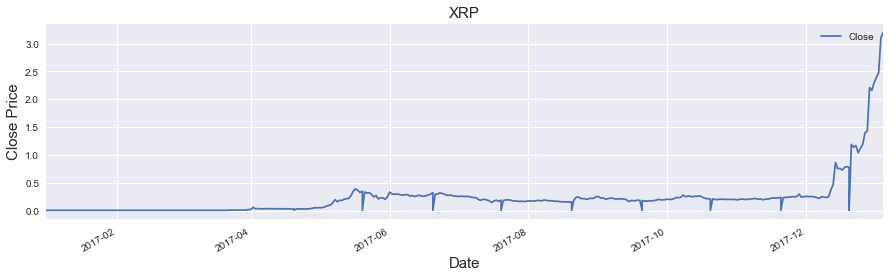

In [9]:
#plot an individual graph for historic closing price data for each of the 15 cryptocurrencies
for name, group in top15.groupby("coin"):
    group.plot(x= "Date", y= "Close", figsize=(15,4), grid = True)
    plt.ylabel("Close Price", fontsize = 15)
    plt.xlabel("Date", fontsize = 15)
    #plt.xlim(top15.iloc[-1,0], top15.iloc[0,0])
    plt.xlim('2017-01-01', top15.iloc[0,0])
    plt.title(name, fontsize = 15)

In [10]:
top5 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")
                      ,:]

top10 = crypto_df.loc[(crypto_df["coin"]=="DASH")|(crypto_df["coin"]=="XEM")|
                      (crypto_df["coin"]=="XMR")|(crypto_df["coin"]=="BTG")|
                      (crypto_df["coin"]=="ETC")
                      ,:]

final_top = crypto_df.loc[(crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:]

In [11]:
top5 = top5[["Date", "Close", "coin"]]
top10 = top10[["Date", "Close", "coin"]]
final_top = final_top[["Date", "Close", "coin"]]

In [12]:
top5.set_index(pd.to_datetime(top5["Date"], format = "%m/%d/%y"), inplace = True) 
top5["Date"]=pd.to_datetime(top5["Date"], format = "%m/%d/%y") 
top5 = top5.reset_index(drop=True)
top10.set_index(pd.to_datetime(top10["Date"], format = "%m/%d/%y"), inplace = True) 
top10["Date"]=pd.to_datetime(top10["Date"], format = "%m/%d/%y") 
top10 = top10.reset_index(drop=True)
final_top.set_index(pd.to_datetime(final_top["Date"], format = "%m/%d/%y"), inplace = True) 
final_top["Date"]=pd.to_datetime(final_top["Date"], format = "%m/%d/%y") 
final_top = final_top.reset_index(drop=True)

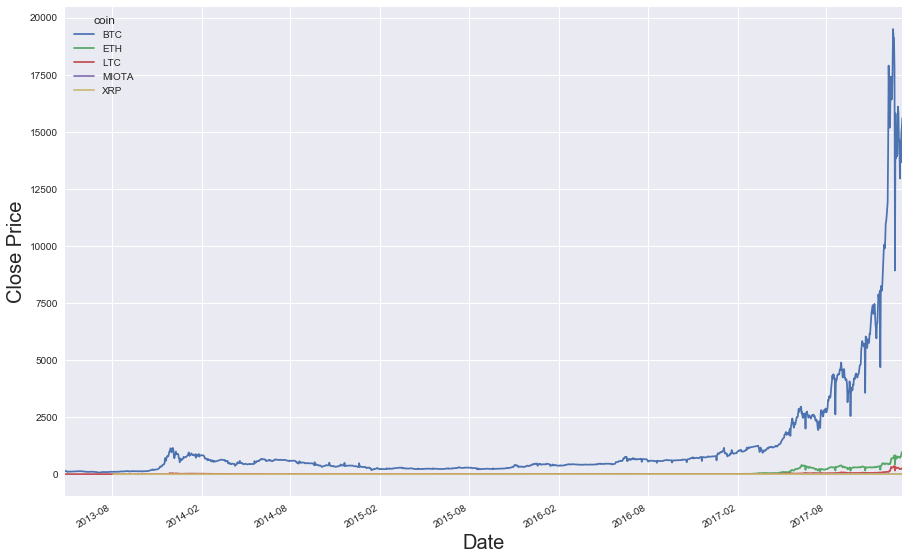

In [13]:
pd.pivot_table(top5, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

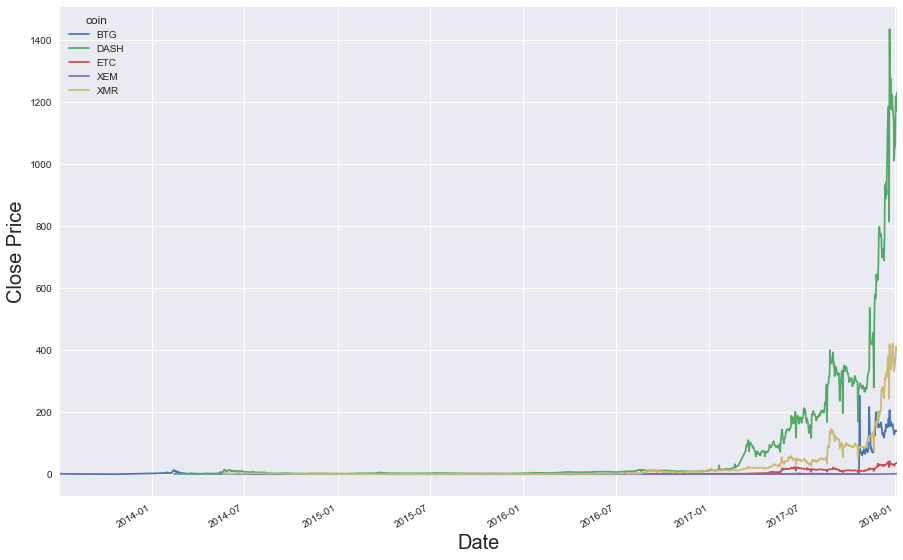

In [14]:
pd.pivot_table(top10, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

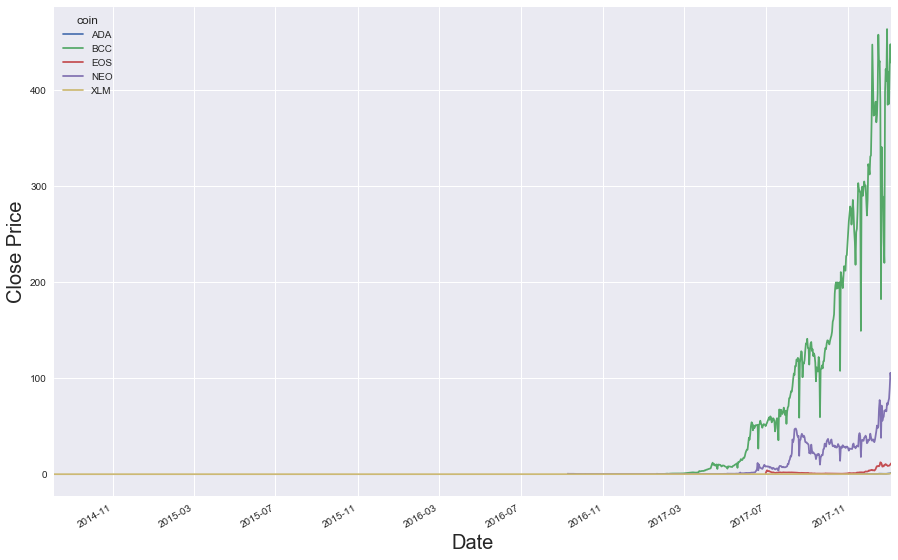

In [15]:
pd.pivot_table(final_top, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

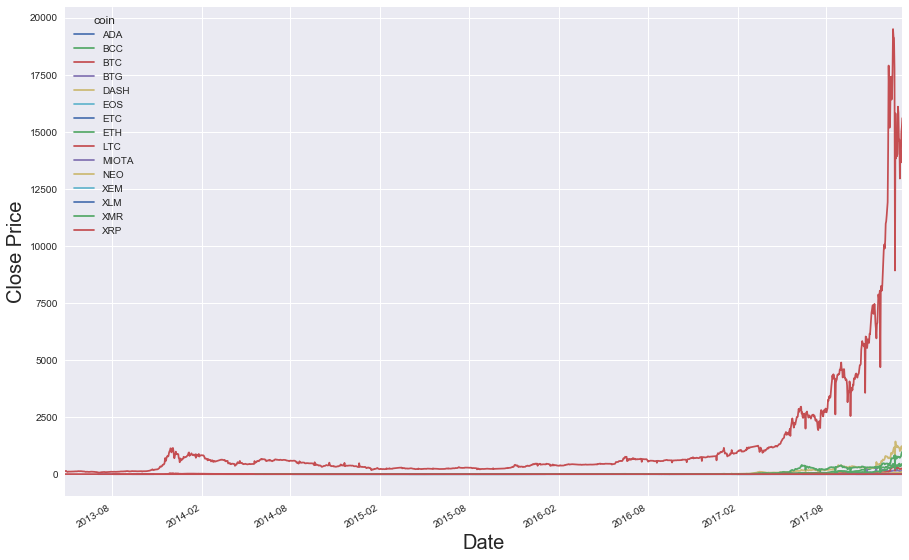

In [16]:
#Plotting all top15 coins together. All coins are trending upwards. 
#All coins experience the majority of their growth in 2017.
pd.pivot_table(top15, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

In [17]:
top15cor = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:] 

In [18]:
top15cor = top15cor[["Date", "Delta", "coin"]]
top15cor['Date'] = pd.to_datetime(top15['Date'])
top15cor = top15cor[(top15cor['Date'] > '2016-12-31') & (top15cor['Date'] <= '2017-12-31')]  
top15cor.head()

,Date,Delta,coin
4,2017-12-31,0.097591,BTC
5,2017-12-30,-0.117812,BTC
6,2017-12-29,-0.002695,BTC
7,2017-12-28,-0.079273,BTC
8,2017-12-27,-0.020107,BTC


In [19]:
#st dev and average of daily return (delta)
top15cor.groupby("coin").agg({np.std, np.mean}) 
top15cor = top15cor.reset_index(drop=True)
top15cor.head()

,Date,Delta,coin
0,2017-12-31,0.097591,BTC
1,2017-12-30,-0.117812,BTC
2,2017-12-29,-0.002695,BTC
3,2017-12-28,-0.079273,BTC
4,2017-12-27,-0.020107,BTC


In [20]:
top15p = pd.pivot_table(top15cor, values= "Delta", columns= "coin", index= "Date")

In [21]:
#daily price correlation among coins
top15p = top15p.corr()
top15p = round(top15p, 2)
top15p

coin,ADA,BCC,BTC,BTG,DASH,EOS,ETC,ETH,LTC,MIOTA,NEO,XEM,XLM,XMR,XRP
coin,,,,,,,,,,,,,,,
ADA,1.00,0.07,0.12,-0.04,0.09,0.11,0.49,0.17,0.13,0.32,0.24,0.18,0.39,0.32,0.40
BCC,0.07,1.00,0.44,0.04,0.13,0.14,0.11,0.22,0.15,0.25,0.06,0.05,0.10,0.18,0.02
BTC,0.12,0.44,1.00,0.11,0.31,0.24,0.35,0.35,0.37,0.40,0.22,0.19,0.22,0.41,0.10
BTG,-0.04,0.04,0.11,1.00,0.05,0.01,0.04,0.04,0.04,0.09,0.00,0.06,-0.04,0.07,-0.04
DASH,0.09,0.13,0.31,0.05,1.00,0.20,0.28,0.37,0.29,0.32,0.21,0.23,0.14,0.49,0.00
EOS,0.11,0.14,0.24,0.01,0.20,1.00,0.30,0.38,0.28,0.24,0.23,0.21,0.21,0.25,0.20
ETC,0.49,0.11,0.35,0.04,0.28,0.30,1.00,0.58,0.48,0.48,0.39,0.31,0.23,0.37,0.08
ETH,0.17,0.22,0.35,0.04,0.37,0.38,0.58,1.00,0.35,0.47,0.26,0.26,0.19,0.46,0.11
LTC,0.13,0.15,0.37,0.04,0.29,0.28,0.48,0.35,1.00,0.35,0.27,0.31,0.26,0.36,0.21


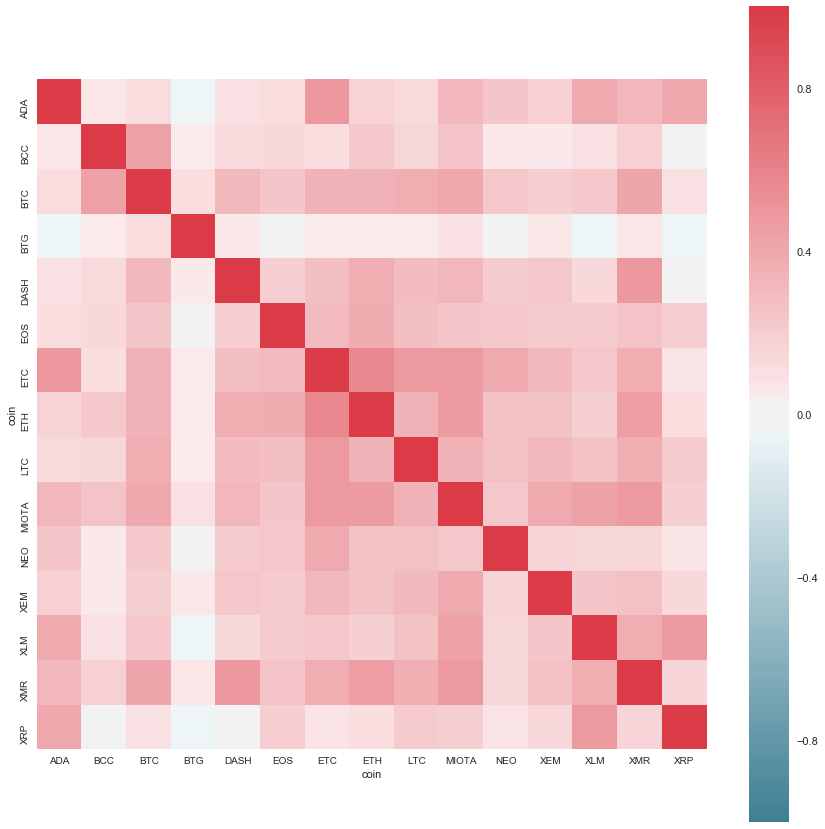

In [22]:
#heat map shows all coins have a positive correlation 
f,ax= plt.subplots(figsize=(15,15))
sns.set(font_scale = 1.1)
sns.heatmap(top15p, mask= np.zeros_like(top15p, dtype= np.bool),cmap= sns.diverging_palette(220,10,as_cmap= True),square = True, ax=ax) 

# 2) Year to Year Growth
  Historical Growth( Year Over Year with Closing Price of Average /Exponential Slope)

In [23]:
# Saving all my sorted_extracted data to the csv file 
top15.to_csv('./top15.to_csv.csv')

In [24]:
#Initialize the dataframe with fill in integers(0), so no value will be empty before plotting a chart
# Minor Data Cleanup
YOY_df = pd.DataFrame({"Top15 Coins": ['ADA','BCC','BTC','BTG','DASH',
                                       'EOS','ETC','ETH','LTC','MIOTA',
                                        'NEO','XEM','XLM','XMR','XRP'], 
                                 "2013_Average": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                                 "2014_Average": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                 "2015_Average": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
                                 "2016_Average": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                                 "2017_Average": [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})

YOY_df.head()

,2013_Average,2014_Average,2015_Average,2016_Average,2017_Average,Top15 Coins
0,0,0,0,0,0,ADA
1,0,0,0,0,0,BCC
2,0,0,0,0,0,BTC
3,0,0,0,0,0,BTG
4,0,0,0,0,0,DASH


In [25]:
#Extracting data with Date, Close and Coin for all the historical years[2013, 2014, 2015, 2016, 2017]
#To plot the graph for the year over year growth.
top15 = top15[["Date", "Close", "coin"]]
top15['Date'] = pd.to_datetime(top15['Date'])

mask = (top15['Date'] > '2012-12-31') & (top15['Date'] <= '2017-12-31')
 
top15 = top15.loc[mask]
top15 = top15.reset_index(drop=True)
 
top15.head()

,Date,Close,coin
0,2017-12-31,14156.4,BTC
1,2017-12-30,12952.2,BTC
2,2017-12-29,14656.2,BTC
3,2017-12-28,14606.5,BTC
4,2017-12-27,15838.5,BTC


In [26]:
#Formatting dataframe 
top15_2017 = top15[["Date", "Close", "coin"]]
top15_2017['Date'] = pd.to_datetime(top15['Date'])
mask = (top15_2017['Date'] > '2016-12-31') & (top15_2017['Date'] <= '2017-12-31')
top15_2017 = top15_2017.loc[mask]
top15_2017 = top15_2017.reset_index(drop=True)
top15_2017.head()

,Date,Close,coin
0,2017-12-31,14156.4,BTC
1,2017-12-30,12952.2,BTC
2,2017-12-29,14656.2,BTC
3,2017-12-28,14606.5,BTC
4,2017-12-27,15838.5,BTC


In [27]:
#Creating year over year growth
columns = ['Coin', '2017 Average']
year2017 = pd.DataFrame(columns = columns)

#appending to dataframe
coins = top15_2017.coin.unique()
for coin in coins:
    coin_df = top15_2017.loc[(top15_2017['coin'] == coin)]
    coin_df = coin_df.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_df['Close'][:-1]):
        coin_list.append(value)
    coin_avg = np.sum(coin_list) 
    sum2017_sum = round(coin_avg, 2)
    sum2017_avg = sum2017_sum/i
    year2017 = year2017.append({'Coin': coin, 
                                              '2017 Average': sum2017_avg},
                                            ignore_index = True)
year2017

,Coin,2017 Average
0,BTC,4025.355234
1,XRP,0.204904
2,ETH,225.126584
3,ADA,0.129111
4,XEM,0.180882
5,LTC,50.295069
6,XLM,0.034105
7,MIOTA,1.047550
8,DASH,249.619972
9,NEO,15.527741


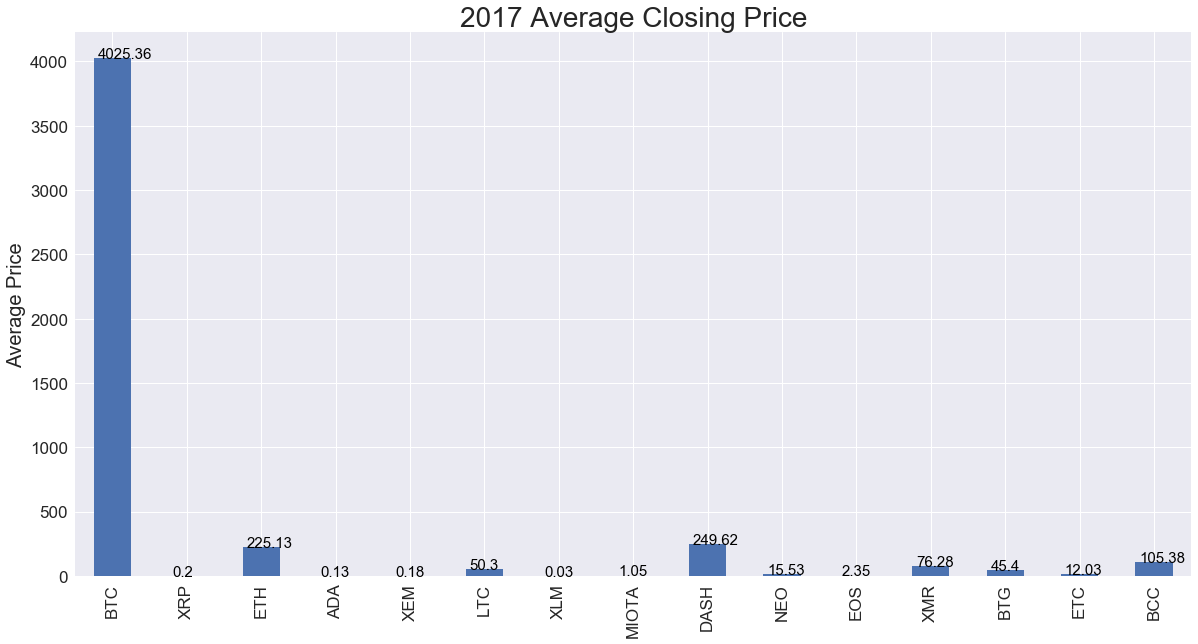

In [28]:
# graph individually to see the growth pattern with year over year growth average of the year 2017
#I am plotting the graph for only 2017 because this is the only year has will all the data for top15 coins.

 
plt.style.use('seaborn')
x = np.arange(15)
year2017.plot(kind = 'bar', x = 'Coin', y = '2017 Average', 
                     legend = False, figsize = (20, 10))
plt.ylabel('Average Price', fontsize = 20)
plt.xlabel('', fontsize = 20)
plt.title('2017 Average Closing Price', fontsize = 28)

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
for a,b in zip(x, year2017['2017 Average']):
    b = round(b,2)
    plt.text(a-0.2, b + 1.5, str(b), color='black',fontsize = 15)
plt.show()

# Save the Figure
plt.savefig("2017_Average_Closing_Price.png")

In [29]:
#Formatting dataframe 
top15_2016 = top15[["Date", "Close", "coin"]]
top15_2016['Date'] = pd.to_datetime(top15_2016['Date'])
mask = (top15_2016['Date'] > '2015-12-31') & (top15_2016['Date'] <= '2016-12-31')
top15_2016 = top15_2016.loc[mask]
top15_2016 = top15_2016.reset_index(drop=True)
top15_2016.head()

,Date,Close,coin
0,2016-12-31,963.74,BTC
1,2016-12-30,961.24,BTC
2,2016-12-29,973.50,BTC
3,2016-12-28,975.92,BTC
4,2016-12-27,933.20,BTC


In [30]:
#Creating volatility for 2016 
columns = ['Coin', '2016 Average']
year2016 = pd.DataFrame(columns = columns)

# appending to dataframe
coins = top15_2016.coin.unique()
for coin in coins:
    coin_df = top15_2016.loc[(top15_2016['coin'] == coin)]
    coin_df = coin_df.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_df['Close'][:-1]):
        coin_list.append(value)
    coin_avg = np.sum(coin_list) 
    sum2016_sum = round(coin_avg, 2)
    sum2016_avg = sum2016_sum/i
    year2016 = year2016.append({'Coin': coin, 
                                              '2016 Average': sum2016_avg},
                                            ignore_index = True)
year2016

,Coin,2016 Average
0,BTC,570.422500
1,XRP,0.006923
2,ETH,9.829121
3,XEM,0.003379
4,LTC,3.799918
5,XLM,0.002005
6,DASH,8.079093
7,NEO,0.184732
8,XMR,3.707115
9,ETC,1.252453


In [31]:
#Formatting dataframe 
top15_2015 = top15[["Date", "Close", "coin"]]
top15_2015['Date'] = pd.to_datetime(top15_2015['Date'])
mask = (top15_2015['Date'] > '2014-12-31') & (top15_2015['Date'] <= '2015-12-31')
top15_2015 = top15_2015.loc[mask]
top15_2015 = top15_2015.reset_index(drop=True)
top15_2015.head()

,Date,Close,coin
0,2015-12-31,430.57,BTC
1,2015-12-30,426.62,BTC
2,2015-12-29,432.98,BTC
3,2015-12-28,422.28,BTC
4,2015-12-27,422.82,BTC


In [32]:
#Creating historical data for 2015
columns = ['Coin', '2015 Average']
year2015 = pd.DataFrame(columns = columns)

#Calculating  appending to dataframe
coins = top15_2015.coin.unique()
for coin in coins:
    coin_df = top15_2015.loc[(top15_2015['coin'] == coin)]
    coin_df = coin_df.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_df['Close'][:-1]):
        coin_list.append(value)
    coin_avg = np.sum(coin_list) 
    sum2015_sum = round(coin_avg, 2)
    sum2015_avg = sum2015_sum/i
    year2015 = year2015.append({'Coin': coin, 
                                              '2015 Average': sum2015_avg},
                                            ignore_index = True)
year2015

,Coin,2015 Average
0,BTC,273.088678
1,XRP,0.008843
2,ETH,0.936690
3,XEM,0.000147
4,LTC,2.702121
5,XLM,0.002810
6,DASH,2.768017
7,XMR,0.492039
8,BTG,0.154945


In [33]:
#Formatting dataframe 
top15_2014 = top15[["Date", "Close", "coin"]]
top15_2014['Date'] = pd.to_datetime(top15_2014['Date'])
mask = (top15_2014['Date'] > '2013-12-31') & (top15_2014['Date'] <= '2014-12-31')
top15_2014 = top15_2014.loc[mask]
top15_2014 = top15_2014.reset_index(drop=True)
top15_2014.head()

,Date,Close,coin
0,2014-12-31,320.19,BTC
1,2014-12-30,310.74,BTC
2,2014-12-29,312.67,BTC
3,2014-12-28,317.24,BTC
4,2014-12-27,315.86,BTC


In [34]:
#Creating year over year 2014
columns = ['Coin', '2014 Average']
year2014 = pd.DataFrame(columns = columns)

#Calculating volatility values & appending to dataframe
coins = top15_2014.coin.unique()
for coin in coins:
    coin_df = top15_2014.loc[(top15_2014['coin'] == coin)]
    coin_df = coin_df.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_df['Close'][:-1]):
        coin_list.append(value)
    coin_avg = np.sum(coin_list) 
    sum2014_sum = round(coin_avg, 2)
    sum2014_avg = sum2014_sum/i
    year2014 = year2014.append({'Coin': coin, 
                                              '2014 Average': sum2014_avg},
                                            ignore_index = True)
year2014

,Coin,2014 Average
0,BTC,528.016474
1,XRP,0.009532
2,LTC,9.831460
3,XLM,0.002721
4,DASH,3.702727
5,XMR,1.562703
6,BTG,1.229107


In [35]:
#Formatting dataframe 
top15_2013 = top15[["Date", "Close", "coin"]]
top15_2013['Date'] = pd.to_datetime(top15_2013['Date'])
mask = (top15_2013['Date'] > '2012-12-31') & (top15_2013['Date'] <= '2013-12-31')
top15_2013 = top15_2013.loc[mask]
top15_2013 = top15_2013.reset_index(drop=True)
top15_2013.head()

,Date,Close,coin
0,2013-12-31,754.01,BTC
1,2013-12-30,756.13,BTC
2,2013-12-29,745.05,BTC
3,2013-12-28,727.83,BTC
4,2013-12-27,735.07,BTC


In [36]:
#Creating year over year data for 2013
columns = ['Coin', '2013 Average']
year2013 = pd.DataFrame(columns = columns)

# appending to dataframe
coins = top15_2013.coin.unique()
for coin in coins:
    coin_df = top15_2013.loc[(top15_2013['coin'] == coin)]
    coin_df = coin_df.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_df['Close'][:-1]):
        coin_list.append(value)
    coin_avg = np.sum(coin_list) 
    sum2013_sum = round(coin_avg, 2)
    sum2013_avg = sum2013_sum/i
    year2013 = year2013.append({'Coin': coin, 
                                              '2013 Average': sum2013_avg},
                                            ignore_index = True)
year2013

,Coin,2013 Average
0,BTC,259.022195
1,XRP,0.013716
2,LTC,6.703130
3,BTG,0.490674


In [37]:
#TRied veryhard and spent couple of days for fillining na, removing empty cells and looping with data structures of mutiple, unfortunately does not work. 
# I did not want to waste anymore time, as I need to do the presentation.

#Creating historical average growth year over year dataframe
#YOY_df # initialized dataframe
#columns = ["Top15 Coins", '2013_Average', '2014_Average','2015_Average','2016_Average','2017_Average']

#YOY_df = pd.DataFrame(columns = columns)
#each_year = []
 
    
# Calculate the Average Scores for each year over year for all Top15 coins
#years = ["2013", "2014", "2015", "2016", "2017"] 
#coins = top15.coin.unique()
 
#dataframe = {'Coins': topcoins, 'Year': years} 
#df = pd.DataFrame(dataframe) 

#for coin in coins:
#   coin_df = top15.loc[(top15['coin'] == coin)]
#    coin_df = coin_df.reset_index(drop=True)
#    coin_list = []
    
#    for year in years: 
#        closeprice_lastday_list = []
#        closeprice_firstday_list = []
#        year_list = []
#        year_percent_list = []
#        year_over = []
#        yoy_coin_list = [] 
#        yoy_avg_list = []

 #       start_date = year + '-01-01'
#        end_date = year + '-12-31'

#        mask = (coin_df['Date'] > start_date) & (coin_df['Date'] <= end_date) & (coin_df['coin'] == coin)
#        #print(mask)
#        #print(coin)
        #print(start_date)
        #print(end_date)
#        year_value = 'sum' + year
#        year_sum = year_value + '_sum'
#        year_avg = year_value + '_avg'
        
        
 #       for i, value in enumerate(coin_df['Close'][:-1]):
            #print(i, value)
#            coin_list.append(value)
            
             
             
#        coin_avg = np.sum(coin_list)
#       #print( i)
#        #print(coin_avg)
#        year_sum = round(coin_avg, 2)
#        year_avg = year_sum/i
#       year_title = year + '_Average'
        
#        each_year.append({'Top15 Coins': coin, 
#                          year_title : year_avg})
                           #ignore_index=True)
 

        # Add each value to the appropriate array
#        yoy_coin_list.append(coin_list)
#        yoy_avg_list.append(each_year)
            
 #    coin_avg = np.sum(coin_list)
    #print( i)
    #print(coin_avg)
#    year_sum = round(coin_avg, 2)
#    year_avg = year_sum/i
    #YOY_df = YOY_df.append({'Top15 Coins': coin, 
                            #year_title : each_year},
                            #ignore_index=True )

 
    
#YOY_df 
#my_list = each_year
#df = pd.DataFrame(np.array(my_list).reshape(15,6), columns = list("abc"))
#print (df)
#df

# 3) Historical Volatility

In [38]:
top15 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:]

In [39]:
#Formatting dataframe 
top15 = top15[["Date", "Close", "coin"]]
top15['Date'] = pd.to_datetime(top15['Date'])
mask = (top15['Date'] > '2016-12-31') & (top15['Date'] <= '2017-12-31')
top15 = top15.loc[mask]
top15 = top15.reset_index(drop=True)
top15.head()

,Date,Close,coin
0,2017-12-31,14156.4,BTC
1,2017-12-30,12952.2,BTC
2,2017-12-29,14656.2,BTC
3,2017-12-28,14606.5,BTC
4,2017-12-27,15838.5,BTC


In [40]:
#Creating historical volatility dataframe
columns = ['Coin', 'Historical Volatility']
volatility_data = pd.DataFrame(columns = columns)

#Calculating volatility values & appending to dataframe
coins = top15.coin.unique()
for coin in coins:
    coin_dataframe = top15.loc[(top15['coin'] == coin)]
    coin_dataframe = coin_dataframe.reset_index(drop=True)
    coin_list = []
    for i, value in enumerate(coin_dataframe['Close'][:-1]):
        coin_list.append(value/coin_dataframe['Close'][i+1] -1)
    coin_stdv = np.std(coin_list)
    annualization_factor = np.sqrt(365)
    volatility_value = round(coin_stdv * annualization_factor, 2)
    volatility_data = volatility_data.append({'Coin': coin, 
                                              'Historical Volatility': volatility_value},
                                            ignore_index = True)
volatility_data.sort_values(by=['Historical Volatility'])

,Coin,Historical Volatility
0,BTC,0.95
2,ETH,1.40
11,XMR,1.53
8,DASH,1.56
13,ETC,1.63
5,LTC,1.66
14,BCC,2.13
7,MIOTA,2.29
4,XEM,2.49
6,XLM,2.65


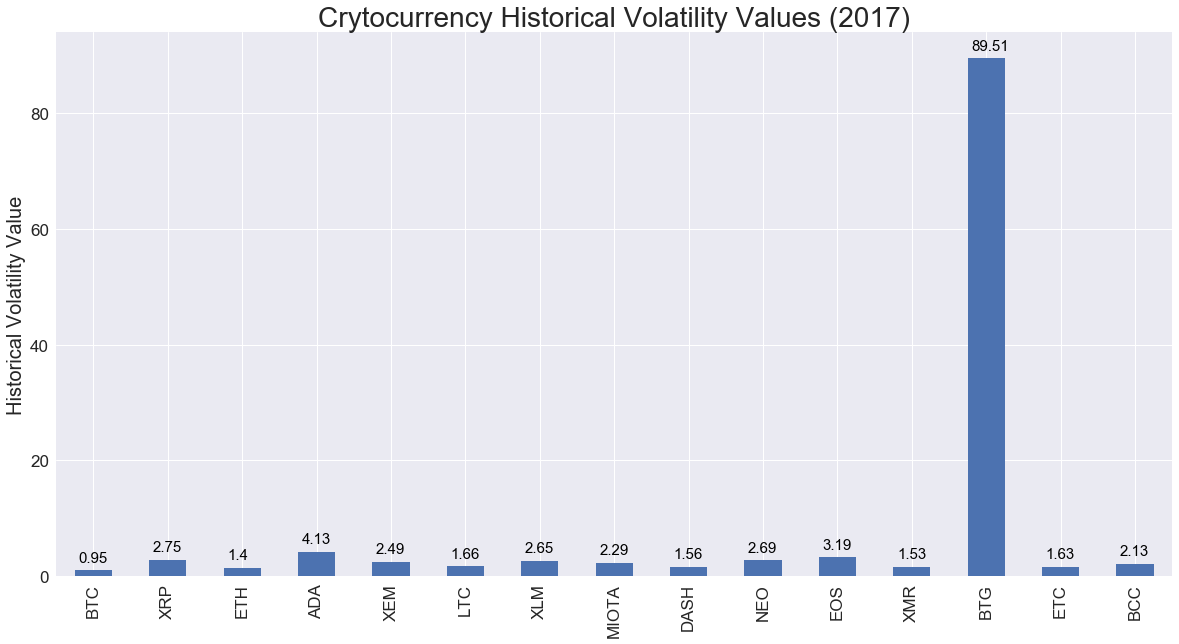

In [41]:
#Plotting data
plt.style.use('seaborn')
x = np.arange(15)
volatility_data.plot(kind = 'bar', x = 'Coin', y = 'Historical Volatility', 
                     legend = False, figsize = (20, 10))
plt.ylabel('Historical Volatility Value', fontsize = 20)
plt.xlabel('', fontsize = 20)
plt.title('Crytocurrency Historical Volatility Values (2017)', fontsize = 28)

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
for a,b in zip(x, volatility_data['Historical Volatility']):
    b = round(b,2)
    plt.text(a-0.2, b + 1.5, str(b), color='black',fontsize = 15)
plt.show()

# 4) A day in the life of a day trader

In [42]:
top15 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:]

In [43]:
print("-----------------------ANALYSIS----------------------")
print("")    
print("Two scenarios were analyzed.")
print("")
print("In the first one, a day trader, noticing a large drop in a coin stock value in one day, would buy it right")
print("before the end of that day betting on a possible significant rebound the day after.  In that case, selling it")
print("at a conveient time during the next day, he/she could make a quick gain.")
print("In order to limit the number of stocks to follow, the trader was interested in knowing, among the 15 coin")
print("stock being examined, those with the highest propensity to frequenly have large growth from their daily")
print("opening values.  This was measured in terms of percentage of days when the stock during the day would become")
print("more than 10% higher than at its opening value.")
print("From this analysis, the best coins to do so were BTG, ADA, EOS, and BCC.  For them, one every three or four")
print("days this situation occurs.  Particular attention should be given to BTG, for which this happens an amazing")
print("44% of the days.")
print("")
print("In the second scenario, a day trader would monitor stocks growing excessively during a given day and then short")
print("them right before the closing bell, hoping that the next day they will drop.  By buying them back sometimes the")
print("next day, the trader could make a quick gain on this short sale.")
print("In this case the propensity to fall more than 10% from the opening bell was examined and BTG, ADA, EOS,and NEO")
print("stocks were observed to show this behavior once or twice per trading week.  Particularly BTG was to be paid")
print("close attention, with an amazing 42% probability that this could happen any given day.")
print("")
print("Given BTG particularly extreme intraday volatility, perhaps the trader could just concentrate on this stock,")
print("buying it at the end of rough days, and shorting it towards the end of good days.")
print("Perhaps an analysis of BTG streaks of positive or negative days (analysis not done here) could further help the")
print("trader to decide the right day to choose for these end-of-the-day trades.")

-----------------------ANALYSIS----------------------

Two scenarios were analyzed.

In the first one, a day trader, noticing a large drop in a coin stock value in one day, would buy it right
before the end of that day betting on a possible significant rebound the day after.  In that case, selling it
at a conveient time during the next day, he/she could make a quick gain.
In order to limit the number of stocks to follow, the trader was interested in knowing, among the 15 coin
stock being examined, those with the highest propensity to frequenly have large growth from their daily
opening values.  This was measured in terms of percentage of days when the stock during the day would become
more than 10% higher than at its opening value.
From this analysis, the best coins to do so were BTG, ADA, EOS, and BCC.  For them, one every three or four
days this situation occurs.  Particular attention should be given to BTG, for which this happens an amazing
44% of the days.

In the second scenario, 

In [44]:
# GROWTH FROM OPENING VALUE
    
# Let's imagine to be a day trader who like to wait each days for the last few tradind minutes to buy stocks that
# are falling significantly hoping that the next day they will experience a natural rebound.
# He/she can see in real time the significant decline.  What he/she can't really predict is how well is going to 
# rebound the next day.
# In any case, it would be important for these trader to start concentrating on stocks that more often than others
# grow a lot from their opening value.
# Therefore, among the 15 proposed stocks, we will now established which ones are the one that, for instance, more
# often show a >10% growth during any given day from their opening value.

# To determine this, first we need to insert in the dataframe a column ("GrowthFromOpen") that captures this 
# percentage growth.

top15["GrowthFromOpen"]=100*(top15["High"]/top15["Open"]-1)
top15.head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,GrowthFromOpen
0,1,1/4/18,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512,3.071241
1,2,1/3/18,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875,3.969769
2,3,1/2/18,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604,13.354862
3,4,1/1/18,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242,0.000000
4,5,12/31/17,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591,11.472588


In [45]:
# Next, we can create a series that captures, for each stock, the percentage of trading days in which the growth from 
# the opening value was more than 10%.
# The first step to do this is to count the number of days that each coin was traded.

tradingDays=top15.groupby("coin")["GrowthFromOpen"].count()
# tradingDays

In [46]:
# Then, to count the number of days with growth exceeding 10%, we can create a dataframe that contains only these days.

growDays_df=top15.loc[top15["GrowthFromOpen"]>10,:]
# growDays_df.head(20)

In [47]:
# In this new dataframe , counting the number of elements for each stock is the same as counting the number of days
# in which that stock has grown more than 10% from its opening value.

growingDays=growDays_df.groupby("coin")["GrowthFromOpen"].count()
# growingDays

In [48]:
# Now we can create a list containing, for each stock, the percentage of days in which the growth from opening was
# more than 10%.  Then, we convert this list into a dataframe.

percGrowthDays=growingDays/tradingDays
percGrowthDays_df=pd.DataFrame(percGrowthDays)
# percGrowthDays_df

In [49]:
# Sort the dataframe from highest to lowest ratio of growing days.

sortedPercGrowthDays_df=percGrowthDays_df.sort_values(by="GrowthFromOpen",ascending=False)
print("For each coin, the percentage of days when its maximum stock value during the day exceeed its opening value by")
print("more than 10% is shown below.")
sortedPercGrowthDays_df

For each coin, the percentage of days when its maximum stock value during the day exceeed its opening value by
more than 10% is shown below.


,GrowthFromOpen
coin,
BTG,0.435603
ADA,0.385417
MIOTA,0.281553
EOS,0.250000
BCC,0.242857
NEO,0.227743
XEM,0.206931
XMR,0.165408
ETC,0.164151


In [50]:
# DROP FROM OPENING VALUE
    
# In a similar scenario as explained above, the day trader may also be looking at stocks that have grown excessively
# during a day and, during the last few minutes of trading, decide to short them, hoping that the next day they will
# fall.
# The process of course is similar to the one followed above, except that now we need to test the propensity to fall
# more than 10% from the opening value, as opposed to the one of growing more than 10%.

# Add to dataframe column that tracks daily percentage declines from opening value.
top15["FallFromOpen"]=100*(top15["Low"]/top15["Open"]-1)
top15.head()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta,GrowthFromOpen,FallFromOpen
0,1,1/4/18,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512,3.071241,-4.901543
1,2,1/3/18,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875,3.969769,-0.892631
2,3,1/2/18,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604,13.354862,-3.386422
3,4,1/1/18,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242,0.000000,-6.784910
4,5,12/31/17,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591,11.472588,-1.101747


In [51]:
# Count the number of days with decline exceeding 10%.

fallDays_df=top15.loc[top15["FallFromOpen"]<-10,:]
fallingDays=fallDays_df.groupby("coin")["FallFromOpen"].count()
fallingDays

coin
ADA       22
BCC       46
BTC       78
BTG      510
DASH     139
EOS       41
ETC       60
ETH       89
LTC      124
MIOTA     62
NEO      104
XEM      147
XLM      147
XMR      189
XRP      108
Name: FallFromOpen, dtype: int64

In [52]:
# Now we can create a list containing, for each stock, the percentage of days in which the decline from opening was
# more than 10%.  Then, we convert this list into a dataframe.

percFallDays=fallingDays/tradingDays
percFallDays

coin
ADA      0.229167
BCC      0.131429
BTC      0.045534
BTG      0.418376
DASH     0.097818
EOS      0.218085
ETC      0.113208
ETH      0.100907
LTC      0.072388
MIOTA    0.300971
NEO      0.215321
XEM      0.145545
XLM      0.117694
XMR      0.142749
XRP      0.066873
dtype: float64

In [53]:
percFallDays_df=pd.DataFrame(percFallDays)
percFallDays_df

,0
coin,
ADA,0.229167
BCC,0.131429
BTC,0.045534
BTG,0.418376
DASH,0.097818
EOS,0.218085
ETC,0.113208
ETH,0.100907
LTC,0.072388


In [54]:
# Sort the dataframe by the second column.
sortedPercFallDays_df=percFallDays_df.sort_values(by=0,ascending=False)
print("For each coin, the percentage of days when its minimum stock value during the days was below its opening value")
print("by more than 10% is shown below.")
sortedPercGrowthDays_df
sortedPercFallDays_df

For each coin, the percentage of days when its minimum stock value during the days was below its opening value
by more than 10% is shown below.


,0
coin,
BTG,0.418376
MIOTA,0.300971
ADA,0.229167
EOS,0.218085
NEO,0.215321
XEM,0.145545
XMR,0.142749
BCC,0.131429
XLM,0.117694
